# Grupo 7


Integrantes:


Francisco RUA


Adrian KOZAMEH


Nicolás DA VIA


Diana INSAURRALDE

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.drop('TARGET', axis=1), dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1.1) El conjunto de datos trata sobre la necesidad de establecer un proceso de automatización para otorgar préstamos hipotecarios, mediante la creación de un modelo de calificación crediticia empíricamente derivado y estadísticamente sólido en donde se utilicen los datos recopilados de aplicaciones para créditos recientes que han sido otorgadas a través del proceso actual de suscripción de préstamos. 
El conjunto de datos sobre Home Equity (HMEQ) contiene información de referencia y de rendimiento de préstamos para 5,960 préstamos sobre el valor líquido de la vivienda recientes.

1.2) La variable binaria a predecir es TARGET. Donde 0 indica que se completó el pago, y 1 que no se terminó de pagar la deuda.

1.3) Son 10 las variables con las que contamos en nuestro conjunto de datos:

- LOAN: Monto solicitado para el préstamo.
- MORTDUE: Importe adeudado en la hipoteca existente.
- VALUE: Valor de la propiedad actual.
- YOJ: Antigüedad en el trabajo actual.
- DEROG: Cantidad de reportes desfavorables relevantes.
- DELINQ: Cantidad de líneas de crédito morosas.
- CLAGE: Edad de la línea comercial más antigua en meses.
- NINQ: Cantidad de líneas de crédito recientes.
- CLNO: Cantidad de líneas de crédito.
- DEBTINC: Tasa deuda / ingreso.

1.4) A simple vista asumimos que los atributos más determinantes serían LOAN (monto solicitado), DELINQ (líneas morosas), VALUE (precio de propiedad), y DEROG (reportes negativos).

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

- **Hacemos un breve repaso del dataset**

In [ ]:
#Descripción sobre el tipo de datos

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TARGET   1854 non-null   int64  
 1   LOAN     1854 non-null   int64  
 2   MORTDUE  1854 non-null   float64
 3   VALUE    1854 non-null   float64
 4   YOJ      1854 non-null   float64
 5   DEROG    1854 non-null   float64
 6   DELINQ   1854 non-null   float64
 7   CLAGE    1854 non-null   float64
 8   NINQ     1854 non-null   float64
 9   CLNO     1854 non-null   float64
 10  DEBTINC  1854 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 159.5 KB


In [ ]:
#Composición del dataset

dataset.shape

(1854, 11)

In [ ]:
# Encabezado de nuestro dataset

dataset.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [ ]:
#Hacemos una revisión de los estadísticos

dataset.describe()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.166667,19111.758360,76316.051780,107321.088457,8.900216,0.187702,0.319849,180.300783,1.128910,21.857066,34.573408
std,0.372779,11000.345961,46227.026585,56039.685066,7.552677,0.704882,0.928452,84.838308,1.664555,9.510840,9.308794
min,0.000000,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,48984.750000,70787.250000,3.000000,0.000000,0.000000,116.970718,0.000000,16.000000,29.427210
50%,0.000000,17000.000000,67201.000000,94198.000000,7.000000,0.000000,0.000000,174.967815,1.000000,21.000000,35.363407
75%,0.000000,23900.000000,93731.500000,122976.250000,13.000000,0.000000,0.000000,232.261800,2.000000,27.000000,39.357987
max,1.000000,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001


2.1) Una de las desventajas del SGD Classifier es que es sensible al escalado de atributos, por lo que es necesario estandarizar los datos que lo componen.

In [ ]:
scaler = MinMaxScaler()

scaled_matrix = scaler.fit_transform(X)

X_scaled = pd.DataFrame(data=scaled_matrix, columns=X.columns)

#Observamos los estadísticos luego de estandarizar

X_scaled.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.197636,0.179512,0.175333,0.217078,0.018770,0.031985,0.153984,0.086839,0.336263,0.235334
std,0.124862,0.117392,0.114016,0.184212,0.070488,0.092845,0.072651,0.128043,0.146321,0.064937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.116913,0.110105,0.101002,0.073171,0.000000,0.000000,0.099751,0.000000,0.246154,0.199434
50%,0.173666,0.156365,0.148633,0.170732,0.000000,0.000000,0.149417,0.076923,0.323077,0.240845
75%,0.251986,0.223738,0.207184,0.317073,0.000000,0.000000,0.198481,0.153846,0.415385,0.268710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Hacemos la división entre entrenamiento y evaluación

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [ ]:
model = SGDClassifier(random_state=0)

model.fit(X_train, y_train);

- **Métricas de entrenamiento**

In [ ]:
y_train_pred = model.predict(X_train)

print(classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1232
           1       0.78      0.35      0.48       251

    accuracy                           0.87      1483
   macro avg       0.83      0.66      0.70      1483
weighted avg       0.86      0.87      0.85      1483



- Matriz de confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


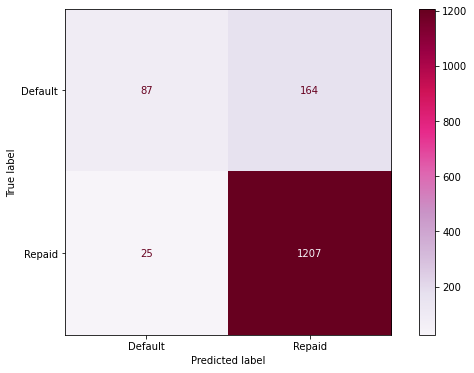

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_confusion_matrix(model, X_train, y_train,
                      ax=ax, cmap=plt.cm.PuRd,
                      labels=[1, 0],
                      display_labels=['Default', 'Repaid']);

- **Métricas de evaluación**

In [ ]:
y_test_pred = model.predict(X_test)

print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       313
           1       0.74      0.34      0.47        58

    accuracy                           0.88       371
   macro avg       0.82      0.66      0.70       371
weighted avg       0.87      0.88      0.86       371



- Matriz de confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


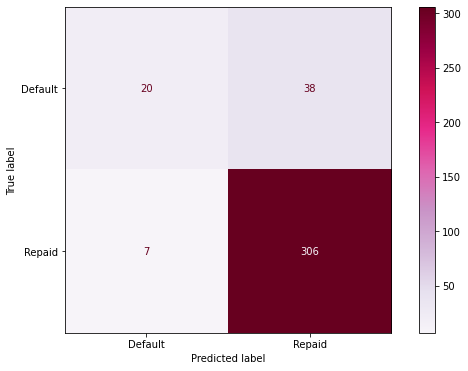

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_confusion_matrix(model, X_test, y_test,
                      ax=ax, cmap=plt.cm.PuRd,
                      labels=[1, 0],
                      display_labels=['Default', 'Repaid']);

. **Conclusión**

- Entrenando y evaluando el clasificador SGB Classifier llegamos a encontrarnos con un desbalanceo de las clases binarias, esto es observar que en nuestro conjunto de datos de entrenamiento contamos con que alguna de las dos clases de la muestra es una clase minoritaria, es decir, de la cual tenemos muy pocos casos.
Cuando tenemos un dataset con desequilibrio suele ocurrir que obtenemos un alto valor de precisión en la clase mayoritaria: en nuestro caso como podemos ver en el reporte de entrenamiento el valor es de 0.88 para la clase 0, incluso mejorando un punto (0.89) en el reporte de evaluación para la misma clase; y un bajo valor de exhaustividad para la clase minoritaria: en nuestro caso como podemos ver en el reporte de entrenamiento el valor es de 0.35 para la clase 1, siendo un punto más bajo en el reporte de evaluación para la misma clase (0.34).
Para la clase 0 tenemos una alta precisión y una alta exhaustividad lo que indica que el modelo maneja muy bien esa clase a partir de las métricas.
Para la clase 1 tenemos una precisón bastante aceptable según los reportes de entrenamiento y evaluación, 0.78 y 0.74 respectivamente, pero una baja exhaustividad para ambos reportes como habíamos mencionado previamente. Esto nos está indicando que el modelo no detecta la clase muy bien, pero cuando lo hace es confiable.
Es por ello que vamos a obervar el indicador F1 que arroja una métrica más parcial, si queremos llamarla, a la hora de contar con una distribución de clases desiguales. En este caso nos importa tanto el valor de precisión como el valor de exhaustividad de cada clase. Para la clase 0, el rendimiento del modelo sigue siento alto, mientras que para la clase 1 el rendimiento es bajo para el modelo que se está utilizando.

- Observamos que la clase minoritaria se encuentra perjudicada por el desbalanceo existente, por lo que podemos recomendar una serie de estrategias para mejorar dicha situación:

  1) **Ajuste de parámetros del modelo**: Se ajustan las métricas del algoritmo para intentar equilibrar la clase minoritaria,  penalizando a la clase mayoritaria durante el entrenamiento.

  2) **Modificar el Dataset**: Por ejemplo, podemos eliminar muestras de la clase mayoritaria para reducirlo e intentar equilibrar la situación. Tiene como contra que podemos prescindir de muestras importantes que brindan información y por lo tanto empeorar el modelo. Entonces para seleccionar qué muestras eliminar, deberíamos seguir algún criterio.

  3) **Muestras artificiales**: Primero podemos intentar crear muestras sintéticas (no idénticas) utilizando diversos algoritmos que intentan seguir la tendencia del grupo minoritario. Según el método, podemos mejorar los resultados. Lo peligroso de crear muestras sintéticas es que podemos alterar la distribución natural de esa clase y confundir al modelo en su clasificación.

  4) **Balanced Ensemble Methods**: Utiliza las ventajas de hacer ensamble de métodos, es decir, entrenar diversos modelos y entre todos obtener el resultado final ("voting") pero se asegura de tomar muestras de entrenamiento equilibradas.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
#Valores para los hiperparámetros

param_grid = {
    'loss': ['hinge', 'perceptron', 'log'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l2', 'l1', 'elasticnet'],
}

In [ ]:
model = SGDClassifier(max_iter=10000, random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train);

In [ ]:
#Resultados de la CV sobre los parámetros de la grilla

results = cv.cv_results_

cols = [
    'param_loss',
    'param_alpha',
    'param_penalty',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]

df = pd.DataFrame(results, columns=cols)

df

,param_loss,param_alpha,param_penalty,mean_test_score,std_test_score,rank_test_score
0,hinge,0.0001,l2,0.868514,0.008732,2
1,hinge,0.0001,l1,0.869190,0.014962,1
2,hinge,0.0001,elasticnet,0.865809,0.006613,3
3,perceptron,0.0001,l2,0.717188,0.272492,37
4,perceptron,0.0001,l1,0.861778,0.012507,6
5,perceptron,0.0001,elasticnet,0.632050,0.283379,43
6,log,0.0001,l2,0.861766,0.012620,7
7,log,0.0001,l1,0.863798,0.014815,5
8,log,0.0001,elasticnet,0.861091,0.013406,9
9,hinge,0.001,l2,0.847609,0.003162,15


In [ ]:
#Análisis del mejor modelo

cv.best_params_

{'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}

In [ ]:
best_model = cv.best_estimator_

best_model.fit(X_train, y_train);

- **Métricas de entrenamiento (II)**

In [ ]:
y_train_pred = best_model.predict(X_train)

print(classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1232
           1       0.81      0.31      0.45       251

    accuracy                           0.87      1483
   macro avg       0.85      0.65      0.69      1483
weighted avg       0.87      0.87      0.85      1483



- Matriz de confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


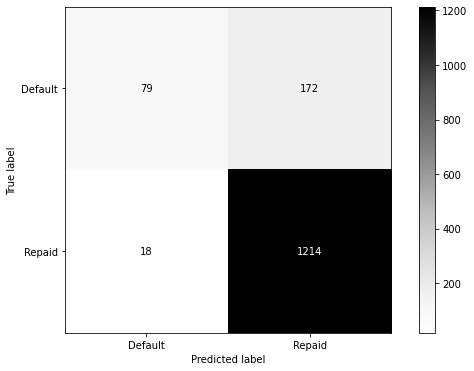

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_confusion_matrix(best_model, X_train, y_train,
                      ax=ax, cmap=plt.cm.Greys,
                      labels=[1, 0],
                      display_labels=['Default', 'Repaid']);

- **Métricas de evaluación (II)**

In [ ]:
y_test_pred = best_model.predict(X_test)

print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.81      0.29      0.43        58

    accuracy                           0.88       371
   macro avg       0.85      0.64      0.68       371
weighted avg       0.87      0.88      0.85       371



- Matriz de confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


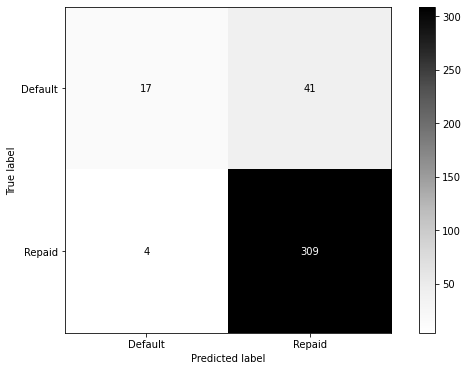

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_confusion_matrix(best_model, X_test, y_test,
                      ax=ax, cmap=plt.cm.Greys,
                      labels=[1, 0],
                      display_labels=['Default', 'Repaid']);

- **Conclusión**

- Podemos concluir a partir del ajuste de hiperparámetros y el cómputo de sus valores óptimos que el modelo no mejora la clasificación a pesar de las distintas combinaciones utilizadas para ello.
Si bien en el modelo entrenado la precisión mejoró aún más para la clase 1 
(0.81), podemos ver que la exhaustividad fue incluso peor (0.31) que antes de realizar los ajustes. Esto se ve profundizado como ocurrió previamente en las métricas de evaluación y también en el valor que debemos observar en este caso en particular que son los falsos positivos. Si bien no fue un aumento de gran magnitud, si se puede ver una predicción incorrecta mayor de la clase positiva (error tipo I). Muy probablemente se deba al cambio en la regularización de Ridge en un comienzo a Lasso para cuando se realizó el ajuste en los hiperparámetros. Ridge es más efectiva cuando creemos que existe una correlación entre los atributos de entrada. 

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
# División entre entrenamiento y evaluación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train);

- **Métricas de entrenamiento**

In [ ]:
y_train_pred = model.predict(X_train)

print(classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



- Matriz de confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


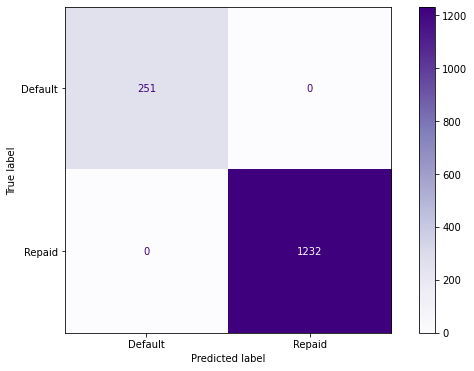

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_confusion_matrix(model, X_train, y_train,
                      ax=ax, cmap=plt.cm.Purples,
                      labels=[1, 0],
                      display_labels=['Default', 'Repaid']);

- **Métricas de evaluación**

In [ ]:
y_test_pred = model.predict(X_test)

print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



- Matriz de confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


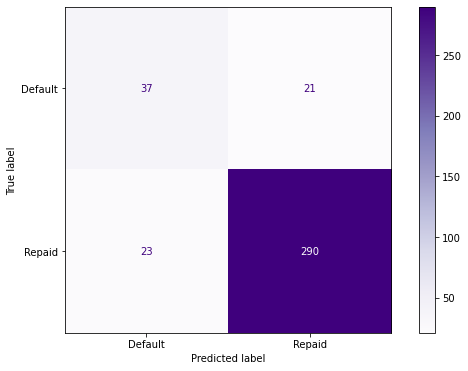

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_confusion_matrix(model, X_test, y_test,
                      ax=ax, cmap=plt.cm.Purples,
                      labels=[1, 0],
                      display_labels=['Default', 'Repaid']);

- **Visualización del árbol**

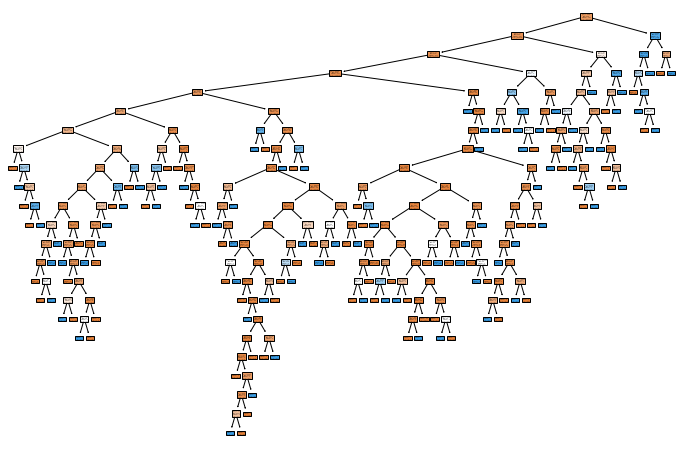

In [ ]:
fig = plt.figure(figsize=(12, 8))

plot_tree(model, filled=True);

In [ ]:
#Profundidad del árbol

model.get_depth()

22

- **Conclusión**

- Podemos observar que existe overfitting en el modelo de DecisionTreeClassifier ya que se desempeña a la perfección con los datos de entrenamiento como bien podemos observar tanto en las métricas como en la matriz de confusión donde ya no contamos con errores de clasificación de tipo I y II. Sin embargo, al observar las métricas de evaluación vemos que la precisión del modelo ha bajado, ya que si se aplica el procedimiento de forma reiterada, eventualmente llegamos a un árbol en el que cada hoja tenga una sola instancia de nuestra variable objetivo a clasificar, por lo que va a tener una pobre generalización y el resultado será un sobreajuste del mismo.

- Dicho esto, también podemos concluir en que este modelo mejora las métricas de evaluación que obtuvimos con el modelo de SGD Classifier con ajuste de hiperparámetros con una mínima reducción en el total de errores de clasificación

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 5, 10, 20, None],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10],
}

In [ ]:
model = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train);

In [ ]:
#Resultados de la CV sobre los parámetros de la grilla

results = cv.cv_results_

cols = [
    'param_criterion',
    'param_max_depth',
    'param_min_samples_leaf',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]

df = pd.DataFrame(results, columns=cols)

df

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
0,gini,1,1,0.869194,0.009254,29
1,gini,1,2,0.869194,0.009254,29
2,gini,1,3,0.869194,0.009254,29
3,gini,1,4,0.869194,0.009254,29
4,gini,1,5,0.869194,0.009254,29
5,gini,1,10,0.869194,0.009254,29
6,gini,5,1,0.874584,0.014342,16
7,gini,5,2,0.874584,0.014342,16
8,gini,5,3,0.874586,0.015238,15
9,gini,5,4,0.873239,0.015548,19


In [ ]:
#Análisis del mejor modelo

cv.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}

In [ ]:
best_model = cv.best_estimator_

best_model.fit(X_train, y_train);

- **Métricas de entrenamiento**

In [ ]:
y_train_pred = best_model.predict(X_train)

print(classification_report(y_train, y_train_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1232
           1       0.99      0.71      0.83       251

    accuracy                           0.95      1483
   macro avg       0.97      0.86      0.90      1483
weighted avg       0.95      0.95      0.95      1483



- Matriz de confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


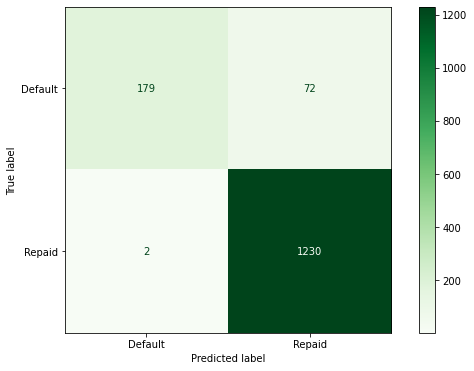

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_confusion_matrix(best_model, X_train, y_train,
                      ax=ax, cmap=plt.cm.Greens,
                      labels=[1, 0],
                      display_labels=['Default', 'Repaid']);

- **Métricas de evaluación**

In [ ]:
y_test_pred = best_model.predict(X_test)

print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       313
           1       0.75      0.52      0.61        58

    accuracy                           0.90       371
   macro avg       0.83      0.74      0.78       371
weighted avg       0.89      0.90      0.89       371



- Matriz de confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


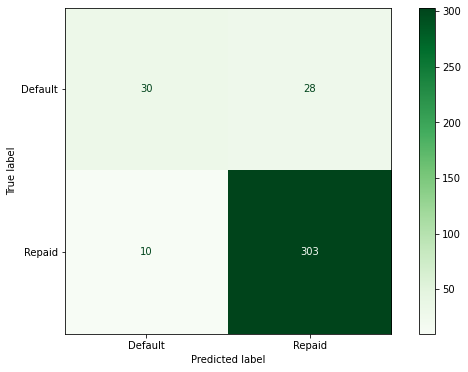

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_confusion_matrix(best_model, X_test, y_test,
                      ax=ax, cmap=plt.cm.Greens,
                      labels=[1, 0],
                      display_labels=['Default', 'Repaid']);

- **Visualización del árbol**

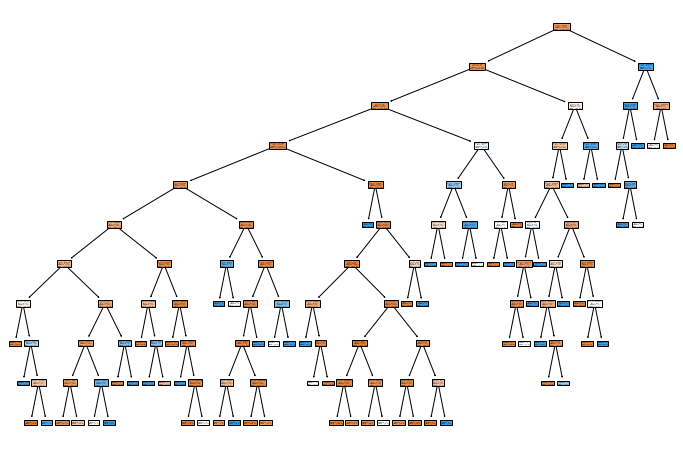

In [ ]:
fig = plt.figure(figsize=(12, 8))

plot_tree(best_model, filled=True);

In [ ]:
#Profundidad del árbol

best_model.get_depth()

10

- **Conclusión**

Observamos que el mejor modelo que se adapta es el que utiliza la medida de impureza de Gini con una profundidad máxima del árbol de 10 (se reduce en 12) y con 2 muestras mínimas por hoja.
De esta manera se evita el overfitting en la etapa de entrenamiento con una precisión de 0.94 y 0.99 para las clases 0 y 1, respectivamente, así como una exactitud del 0.95; pero al estar las clases desbalanceadas nos fijamos en las métricas de exhaustividad y el score F1 y observamos que ambas han mejorado en lo que respecta a los otros modelos de clasificación. Esto es así debido a que se produjo una disminución significativa con respecto a los errores I y II de clasificación. Con respecto a los datos de evaluación obtuvimos la mejor generalización del laboratorio con un 0.90 de exactitud.

A su vez, podemos tener una mejor interpretación del árbol a partir de una profundidad más ligera que en el caso previo.
